# Programming Exercise 2: Logistic Regression

> In this exercise, you will implement logistic regression and apply it to two different datasets.

## 1. Logistic Regression

> In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

### 1.1 Visualizing the Data

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import pandas as pd
df = pd.read_csv('data/ex2data1.txt', sep=',', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'label']

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


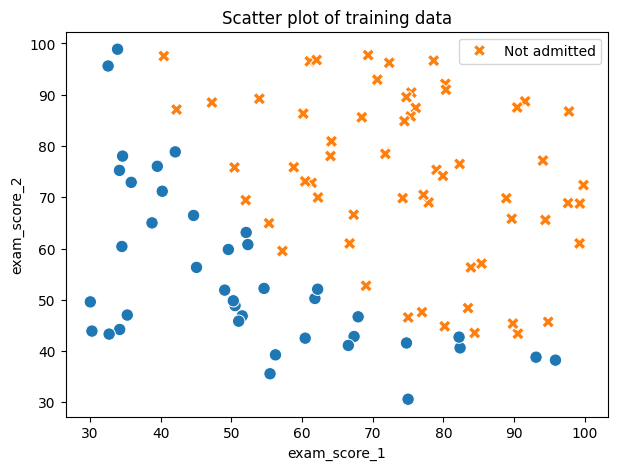

In [11]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

### 1.2 Implementation

#### 1.2.1 Sigmoid Function

Logistic regression hypothesis: 

$$h_\theta(x) = g(\theta^Tx)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

In [12]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

Plot of sigmoid function:

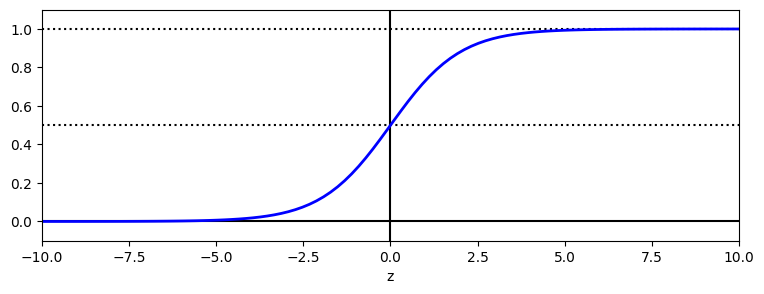

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

#### 1.2.2 Cost Function and Gradient

Cost function in logistic regression is:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$

Vectorized implementation:

$h = g(X\theta)$

$J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$



The gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

$$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [14]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [15]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [16]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [17]:
test_theta = np.array([-24, 0.2, 0.2])
[cost, grad] = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[0.21833019]]
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647


#### 1.2.3 Learning Parameters using an optimization solver
"Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, faster ways to optimize $\theta$ that can be used instead of gradient descent. 

In [18]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [19]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

/tmp/ipykernel_396142/1274892550.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


In [20]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: 0.20349770158947478
Expected cost (approx): 0.203
theta:
 [[-25.16131857]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


#### Decision boundary

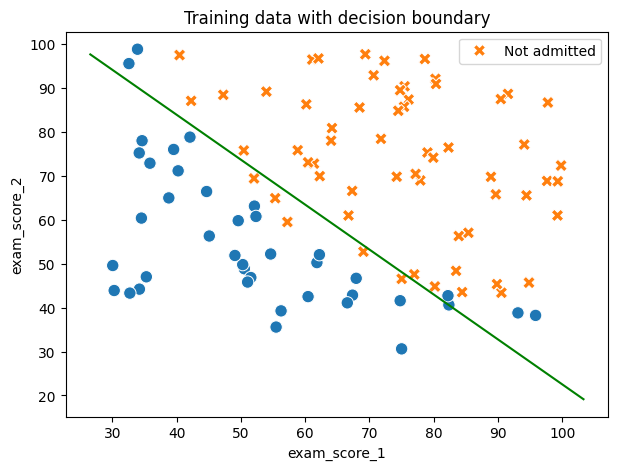

In [21]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

#### 1.2.4 Evaluating Logistic Regression

Predict whether a particular student will be admitted

In [22]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7762906222622858
Expected value: 0.775 +/- 0.002


Accuracy on training set

In [23]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [24]:
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == df.label.values) * 100}'

'Train accuracy: 89.0'

#### 1.2.5 Equivalent code using Scikit-Learn:

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(df[['exam_score_1', 'exam_score_2']].values,
            df.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [26]:
log_reg.intercept_, log_reg.coef_

(array([-25.05200378]), array([[0.2053533 , 0.20058239]]))

Sklearn logistic regression accuracy:

In [27]:
log_reg.score(df[['exam_score_1', 'exam_score_2']].values,
              df.label.values)

0.89

## 2. Regularized Logistic Regression

> In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the Data

In [28]:
df2 = pd.read_csv('data/ex2data2.txt', sep=',', header=None)
df2.columns = ['test_1', 'test_2', 'label']

In [29]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
test_1,118.0,0.054779,0.496654,-0.83007,-0.372120,-0.006336,0.478970,1.0709
test_2,118.0,0.183102,0.519743,-0.76974,-0.254385,0.213455,0.646563,1.1089
label,118.0,0.491525,0.502060,0.00000,0.000000,0.000000,1.000000,1.0000


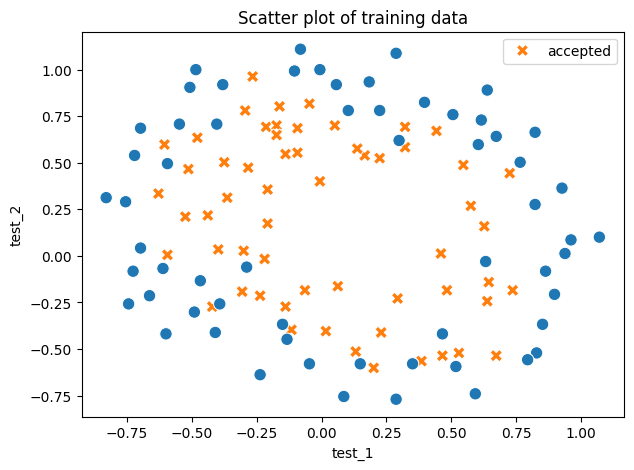

In [30]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='test_1', y='test_2', hue='label', data=df2, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['accepted', 'rejected'])
plt.title('Scatter plot of training data')
plt.show(ax)

### 2.2 Feature Mapping

> One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power. As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

In [31]:
def map_feature(X1, X2, degree):
    X1 = np.array(X1).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            p = (X1**(i-j)) * (X2**j)
            out = np.append(out, p, axis=1)
    return out

In [32]:
X_p = map_feature(df2.test_1.values, df2.test_2.values, 6)
X_p.shape

(118, 28)

### 2.3 Cost Function and Gradient

Regularized cost function in logistic regression:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))] + \frac{\lambda}{2m} \sum_{j=1}^n\theta_j^2$$

Gradient:

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)} - y^{(i)})\cdot x_j^{(i)} \ \text{for j=0}$$

$$\frac{\partial J(\theta)}{\partial \theta_0} = (\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)} - y^{(i)})\cdot x_j^{(i)}) + \frac{\lambda}{m}\theta_j \ \text{for j$\ge$1}$$

In [33]:
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

#### 2.3.1 Learning Parameters

In [34]:
import scipy.optimize as opt
def optimize_theta_reg(X, y, initial_theta, lambda_reg):
    opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [35]:
m = df.shape[0]
X = X_p
y = np.array(df2.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [36]:
lambda_reg = 1
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - top 5:')
print(grad.T[:5])
print('Expected gradients top 5(approx):\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - top 5:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients top 5(approx):
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [37]:
lambda_reg = 10
initial_theta = np.ones(shape=(X.shape[1]))
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta:', cost)
print('Expected cost (approx): 3.16')
print('Gradient at theta - top 5:')
print(grad.T[:5])
print('Expected gradients top 5(approx):\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at initial theta: [[3.16450933]]
Expected cost (approx): 3.16
Gradient at theta - top 5:
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
Expected gradients top 5(approx):
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


### 2.4 Plotting the Decision Boundary

/tmp/ipykernel_396142/968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
/tmp/ipykernel_396142/968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
/tmp/ipykernel_396142/968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
/tmp/ipykernel_396142/968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt

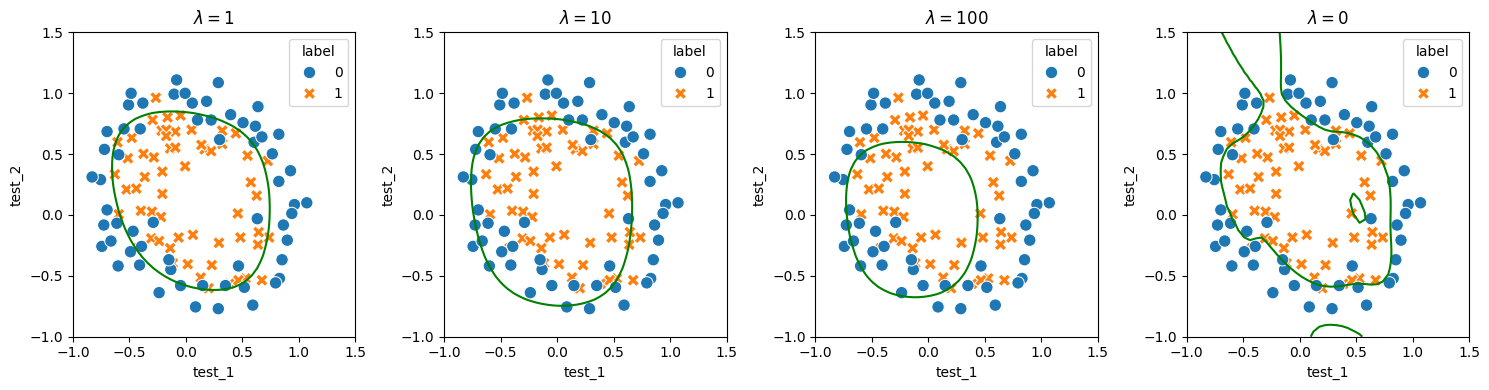

In [38]:
lambda_reg = [1, 10, 100, 0]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    theta_opt, cost = optimize_theta_reg(X, y, initial_theta, l)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], 6).dot(theta_opt)
    
    sns.scatterplot(x='test_1', y='test_2', hue='label', data=df2, style='label', s=80, ax=axs[il])
    
    axs[il].contour(u, v, z.T, levels=[0], colors='green')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()

### 2.5 Accuracy on Training Set

In [39]:
lambda_reg = 1
theta, cost = optimize_theta_reg(X, y, initial_theta, lambda_reg)
theta

/tmp/ipykernel_396142/968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})


array([ 1.27273509,  0.62525435,  1.18108521, -2.01994882, -0.91742555,
       -1.43167368,  0.12399628, -0.36552234, -0.35723208, -0.17514253,
       -1.4581339 , -0.05098852, -0.61553085, -0.27470069, -1.19280263,
       -0.24220871, -0.20601057, -0.04472766, -0.2777735 , -0.29536755,
       -0.45637086, -1.04318579,  0.02776829, -0.29241701,  0.01556523,
       -0.32737793, -0.14388044, -0.92463148])

In [40]:
y_pred_prob = predict(X, theta)
f'Train accuracy: {np.mean(y_pred_prob == df2.label.values) * 100}'

'Train accuracy: 83.05084745762711'

### 2.6 Equivalent Code using Scikit-Learn:

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(X[:,1:], df2.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [42]:
log_reg.intercept_, log_reg.coef_

(array([1.27273852]),
 array([[ 0.62527427,  1.18107953, -2.01995701, -0.91743361, -1.43166228,
          0.12400943, -0.36552879, -0.35723375, -0.1751281 , -1.45816817,
         -0.05099315, -0.61556795, -0.27470949, -1.19281161, -0.24218951,
         -0.20599958, -0.04473522, -0.27778736, -0.29537501, -0.45635027,
         -1.04321271,  0.02777197, -0.29243756,  0.0155633 , -0.32738395,
         -0.14388956, -0.92464266]]))

In [43]:
log_reg.score(X[:,1:], df2.label.values)

0.8305084745762712